In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('C:/Users/mpere/Downloads/netflix_titles.csv/netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   show_id          8807 non-null   object 
 1   type             8807 non-null   object 
 2   title            8807 non-null   object 
 3   director         6173 non-null   object 
 4   cast             7982 non-null   object 
 5   country          7976 non-null   object 
 6   date_added       8797 non-null   object 
 7   release_year     8807 non-null   int64  
 8   rating           8803 non-null   object 
 9   duration         8804 non-null   object 
 10  listed_in        8807 non-null   object 
 11  description      8807 non-null   object 
 12  sentiment_score  8807 non-null   float64
 13  sentiment_label  8807 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 963.4+ KB


Para este proyecto me prepare algunas preguntas basicas como para arrancar a utilizar para este dataset. Las voy a ir respondiendo y visualizando en el jupyter

1. Contenido por País y Región:
 - ¿En qué países Netflix tiene más contenido disponible?
 - ¿Qué géneros son más populares en diferentes países?
 - ¿Qué países producen más series vs. películas?

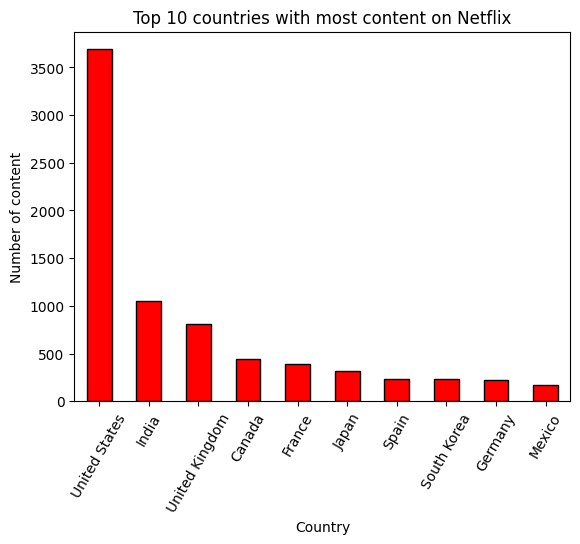

In [31]:
countries = df['country']

countries = countries.str.split(',')
countries = countries.explode() # split the list into rows
countries = countries.str.strip() # remove white spaces

countries.value_counts().head(10).plot(kind='bar', color='red', edgecolor='black', rot=60)
plt.title('Top 10 countries with most content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of content')
plt.show()

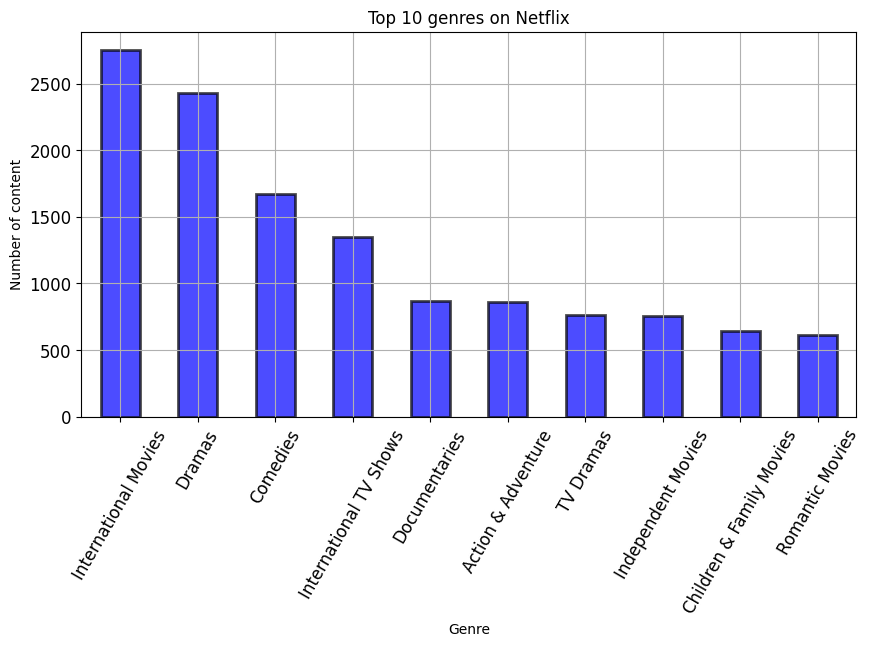

In [7]:
genres = df['listed_in']

genres = genres.str.split(',')
genres = genres.explode() # split the list into rows
genres = genres.str.strip() # remove white spaces

genres.value_counts().head(10).plot(kind='bar', color='blue', edgecolor='black', rot=60, alpha=0.7, figsize=(10, 5), fontsize=12, linewidth=2, grid=True)
plt.title('Top 10 genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of content')
plt.show()

In [8]:
import plotly.express as px

C:\Users\mpere\AppData\Local\Temp\ipykernel_15984\1722028400.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mpere\AppData\Local\Temp\ipykernel_15984\1722028400.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mpere\AppData\Local\Temp\ipykernel_15984\1722028400.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

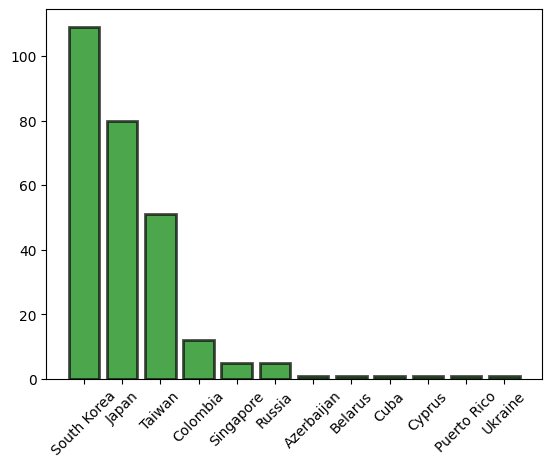

In [30]:
df_more_tv = df[['type', 'country']]

df_more_tv['country'] = df_more_tv['country'].str.split(',')
df_more_tv = df_more_tv.explode('country')
df_more_tv['country'] = df_more_tv['country'].str.strip()

df_more_tv.dropna(subset=['country'], inplace=True)
df_more_tv.reset_index(drop=True, inplace=True)

df_counts = df_more_tv.groupby(['country', 'type']).size().unstack(fill_value=0).reset_index()

if 'Movie' not in df_counts.columns:
    df_counts['Movie'] = 0
if 'TV Show' not in df_counts.columns:
    df_counts['TV Show'] = 0

df_counts['diference'] = df_counts['TV Show'] - df_counts['Movie'] 

df_more_tv = df_counts[df_counts['diference'] > 0]

df_more_tv['country_plot'] = df_more_tv['country']

df_more_tv.sort_values(by='diference', ascending=False, inplace=True)

plt.bar(df_more_tv['country'], df_more_tv['diference'], color='green', edgecolor='black', alpha=0.7, linewidth=2)
plt.xticks(rotation=45)
plt.show()

fig = px.choropleth(
    df_more_tv,
    locations='country_plot',
    locationmode='country names',
    color='diference',
    hover_name='country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Countries with more TV Shows than Movies'
)

fig.update_geos(showcountries=True)
fig.update_layout(
    title_text='Countries with more TV Shows than Movies',
    geo=dict(showframe=False, showcoastlines=True)
)
fig.show()

2. Análisis Temporal y Tendencias:
 - ¿Cómo ha cambiado la producción de contenido a lo largo de los años?
 - ¿Netflix se ha enfocado más en series o películas en los últimos años?
 - ¿Hay tendencias estacionales en los lanzamientos de contenido? (Por ejemplo, más estrenos en diciembre)
 - ¿Cómo ha evolucionado el tipo de clasificación por edades a lo largo de los años?

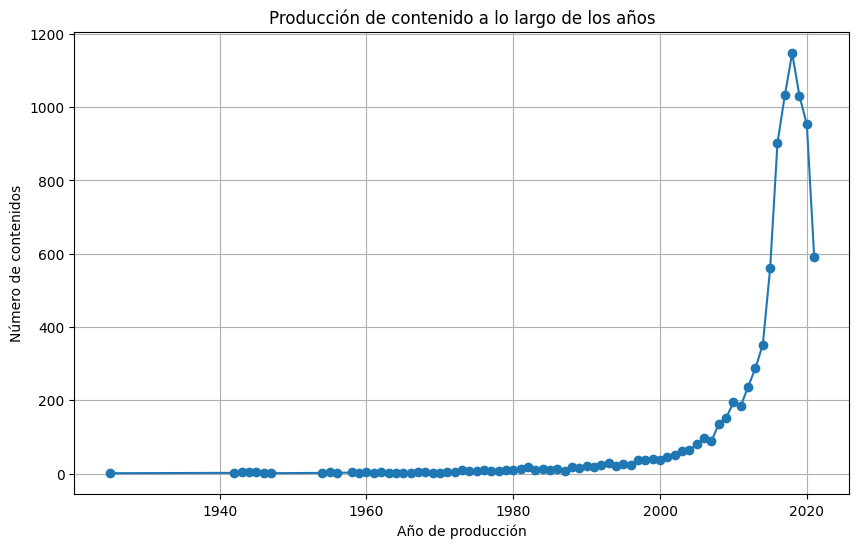

In [38]:
production_per_year = df.groupby('release_year').size()

plt.figure(figsize=(10, 6))
plt.plot(production_per_year.index, production_per_year.values, marker='o', linestyle='-')
plt.title("Producción de contenido a lo largo de los años")
plt.xlabel("Año de producción")
plt.ylabel("Número de contenidos")
plt.grid(True)
plt.show()

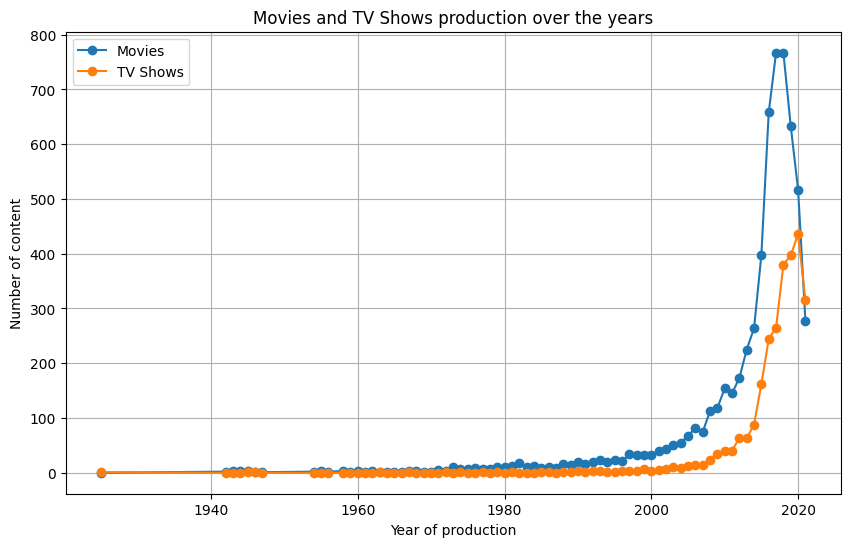

In [39]:
movies_per_year = df.groupby('release_year')['type'].apply(lambda x: (x == 'Movie').sum())
tv_shows_per_year = df.groupby('release_year')['type'].apply(lambda x: (x == 'TV Show').sum())

plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-', label='Movies')
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, marker='o', linestyle='-', label='TV Shows')
plt.title("Movies and TV Shows production over the years")
plt.xlabel("Year of production")
plt.ylabel("Number of content")
plt.grid(True)
plt.legend()
plt.show()

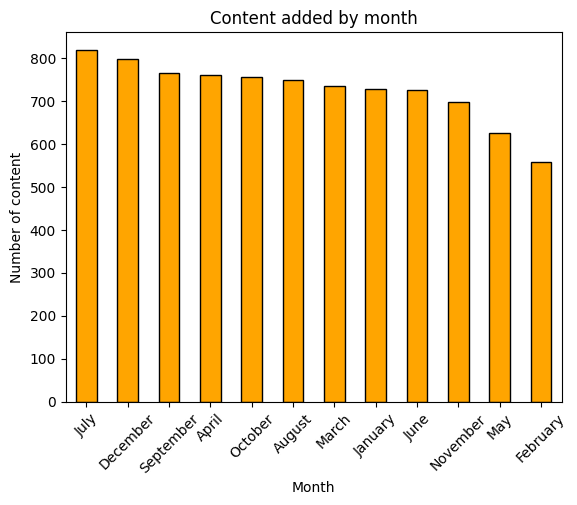

In [52]:
months_releases = df['date_added'].str.split(' ', expand=True)[0]
months_releases = months_releases[months_releases != '']
months_releases.groupby(months_releases).size().sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black', rot=45)
plt.title('Content added by month')
plt.xlabel('Month')
plt.ylabel('Number of content')
plt.show()

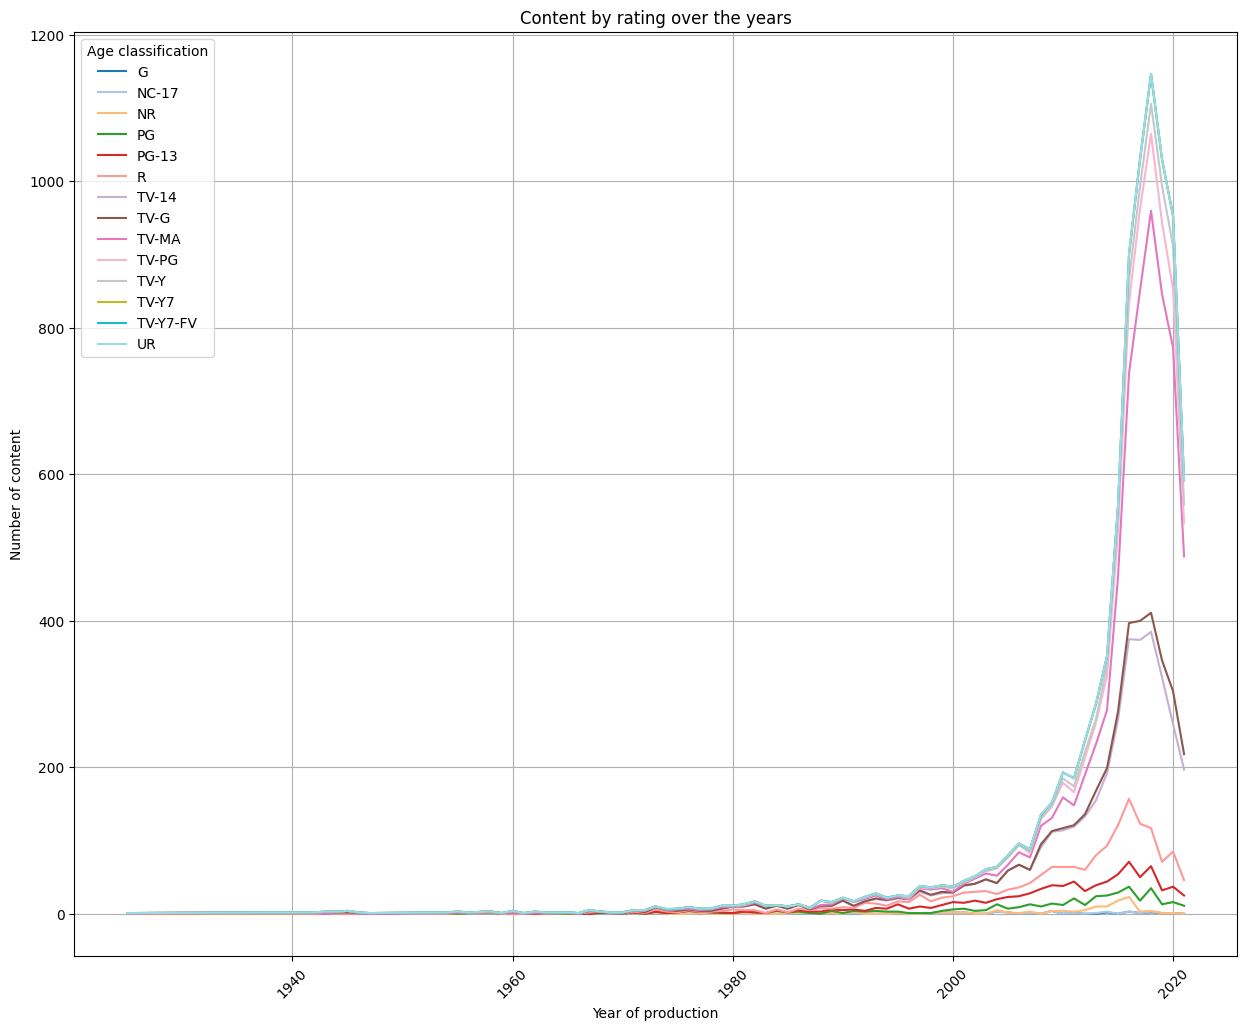

In [58]:
table = pd.crosstab(df['release_year'], df['rating'])

ratings = [col for col in table.columns if 'min' in col.lower()]
table.drop(columns=ratings, inplace=True)

plt.figure(figsize=(15, 12))
table.plot(kind='line', stacked=True, alpha=1, cmap='tab20', ax=plt.gca())
plt.title('Content by rating over the years')
plt.xlabel('Year of production')
plt.ylabel('Number of content')
plt.xticks(rotation=45)
plt.legend(title='Age classification')
plt.grid(True)
plt.show()

3. Análisis de Géneros y Categorías:
 - ¿Cuáles son los géneros más comunes y cómo se distribuyen entre series y películas?
 - ¿Qué géneros tienden a tener clasificaciones de edad más altas o más bajas?
 - ¿Hay alguna relación entre la duración del contenido y el género?

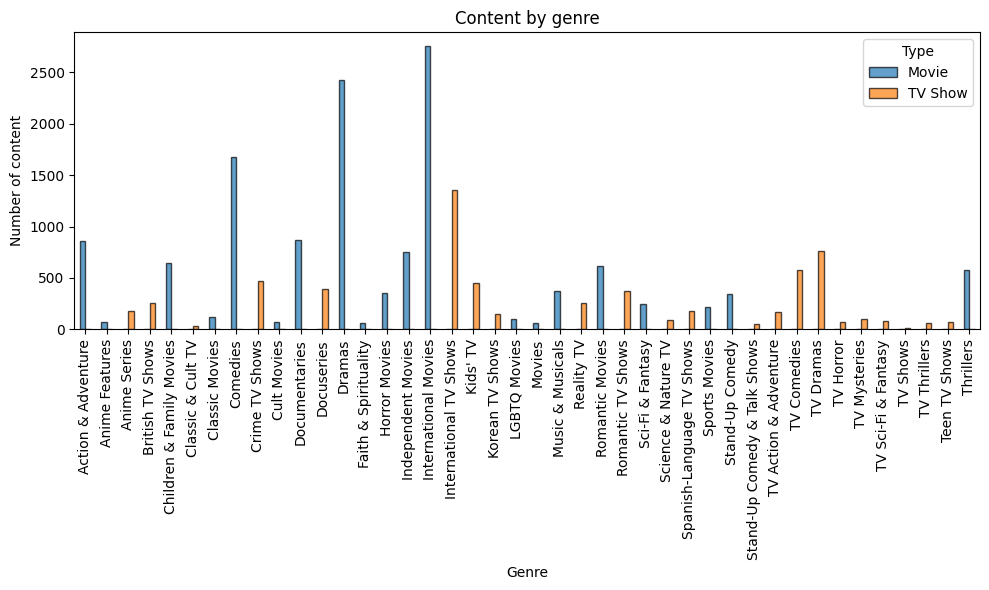

In [7]:
df_copy = df.copy()

df_copy['content_type'] = df['type'].apply(lambda x: "TV Show" if "TV" in x else ("Movie" if "Movie" in x else x))
df_copy = df_copy.dropna(subset=['listed_in'], inplace=False)

if df_copy['listed_in'].str.contains(',').any():
    df_copy['listed_in'] = df_copy['listed_in'].str.split(',')
    df_copy = df_copy.explode('listed_in')
    df_copy['listed_in'] = df_copy['listed_in'].str.strip()

table_genres = pd.crosstab(df_copy['listed_in'], df_copy['type'])
plt.figure(figsize=(10, 6))
table_genres.plot(kind='bar', color=['#1f77b4','#ff7f0e'], edgecolor='black', alpha=0.7, ax=plt.gca())
plt.title('Content by genre')
plt.xlabel('Genre')
plt.ylabel('Number of content')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


Este grafico de aca arriba no esta bien debido que deberia juntar los TV Shows y Movies que se relacionan entre si (ejemplo: TV Dramas y Dramas), el mismo se deberia de mostrar con un grafico de barras partidas o agrupadas y no así.

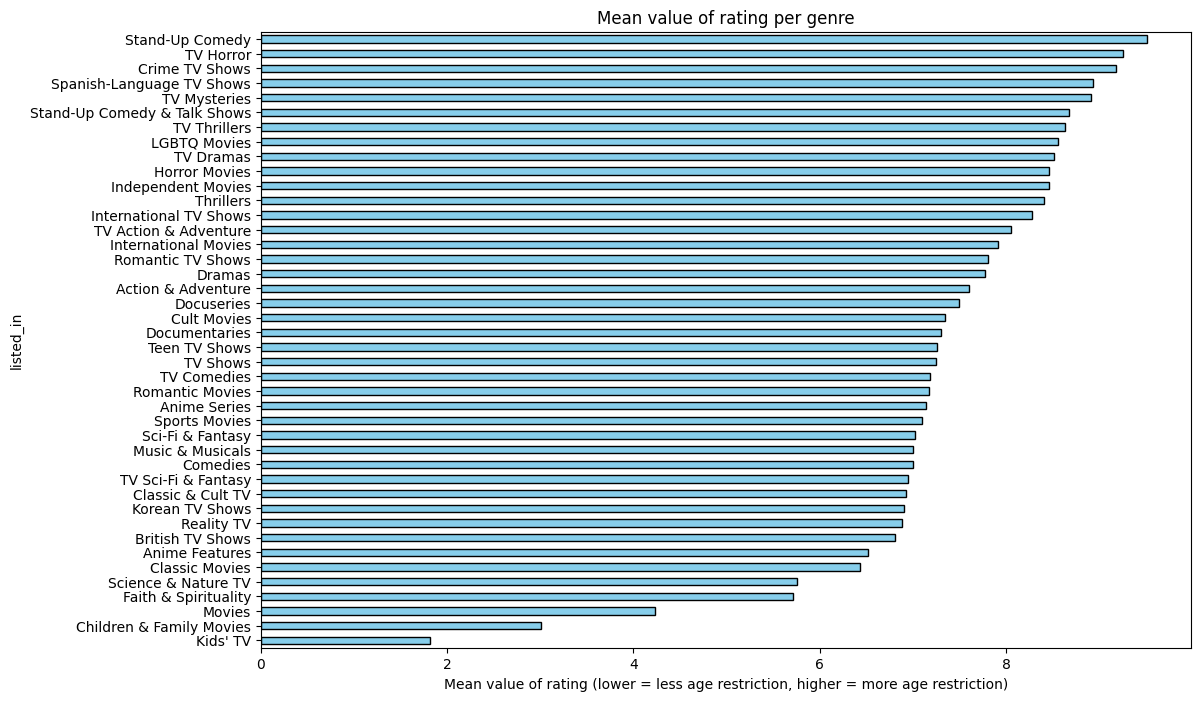

In [9]:
rating_mapping = {
    'TV-Y': 0,
    'TV-G': 1,
    'G': 2,
    'TV-Y7': 3,
    'PG': 4,
    'TV-PG': 5,
    'PG-13': 6,
    'TV-14': 7,
    'R': 8,
    'NC-17': 9,
    'TV-MA': 10
}

# Prepare a DataFrame with exploded genres
df_genres = df[['listed_in', 'rating']].copy()
df_genres['listed_in'] = df_genres['listed_in'].str.split(',')
df_genres = df_genres.explode('listed_in')
df_genres['listed_in'] = df_genres['listed_in'].str.strip()

# Keep only rows with ratings defined in our mapping
df_genres = df_genres[df_genres['rating'].isin(rating_mapping.keys())].copy()
df_genres['rating_value'] = df_genres['rating'].map(rating_mapping)

# Calculate the average rating value per genre
genre_avg_rating = df_genres.groupby('listed_in')['rating_value'].mean().sort_values()

# Plot the results: lower values = menos restricción de edad, valores mayores = más restricción de edad
plt.figure(figsize=(12, 8))
genre_avg_rating.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Mean value of rating (lower = less age restriction, higher = more age restriction)')
plt.title('Mean value of rating per genre')
plt.show()

In [ ]:
import seaborn as sns

C:\Users\mpere\AppData\Local\Temp\ipykernel_9244\3784880819.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_avg_duration, x='duration', y='listed_in', palette='viridis')


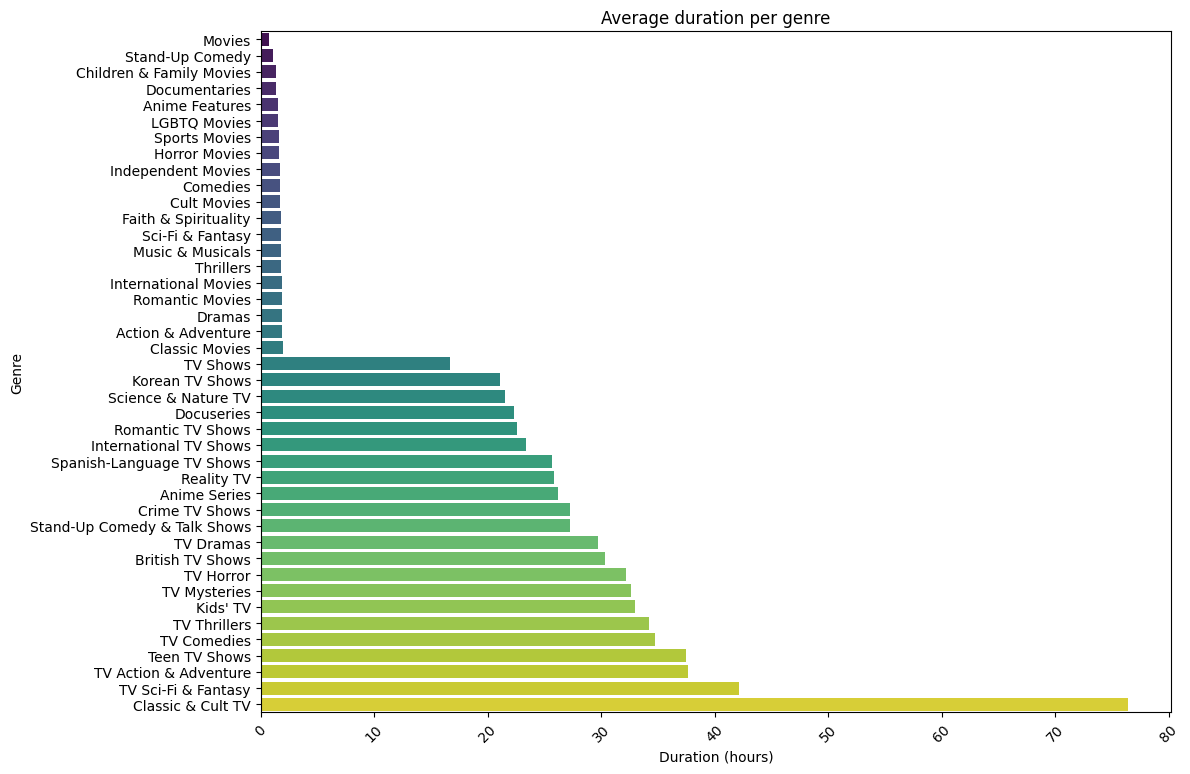

In [38]:
#¿Hay alguna relación entre la duración del contenido y el género?
seasons_mapping = {
    '1 Season': 1000,
    '2 Seasons': 2000,
    '3 Seasons': 3000,
    '4 Seasons': 4000,
    '5 Seasons': 5000,
    '6 Seasons': 6000,
    '7 Seasons': 7000,
    '8 Seasons': 8000,
    '9 Seasons': 9000,
    '10 Seasons': 10000,
} # Taking account that 1 season has 20 episodes on average and each episode lasts 50 minutes

df_duration = df[['duration', 'listed_in']].copy()

df_duration = df_duration.dropna()

df_duration['duration'] = df_duration['duration'].apply(
    lambda x: int(x.replace(' min', '')) if x.endswith('min')
                    else seasons_mapping.get(x, np.nan)
)

df_duration['duration'] = df_duration['duration'].apply(lambda x: x / 60)

df_duration['listed_in'] = df_duration['listed_in'].str.split(',')
df_duration = df_duration.explode('listed_in')
df_duration['listed_in'] = df_duration['listed_in'].str.strip()

# Calculate the average duration per genre
genre_avg_duration = df_duration.groupby('listed_in')['duration'].mean().sort_values().reset_index()


# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_avg_duration, x='duration', y='listed_in', palette='viridis')
plt.xlabel('Duration (hours)')
plt.ylabel('Genre')
plt.title('Average duration per genre')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Análisis de Texto y Similaridad:
 - ¿Cuáles son las palabras más comunes en las descripciones de películas y series?
 - ¿Es posible agrupar títulos similares basándose en descripciones? (Utilizando técnicas de NLP como TF-IDF y clustering)
 - ¿Se puede identificar una "fórmula" en las descripciones de cierto tipo de contenido?

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\mpere\AppData\Local\Temp\ipykernel_9244\868099328.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=top_10_words, palette='viridis')


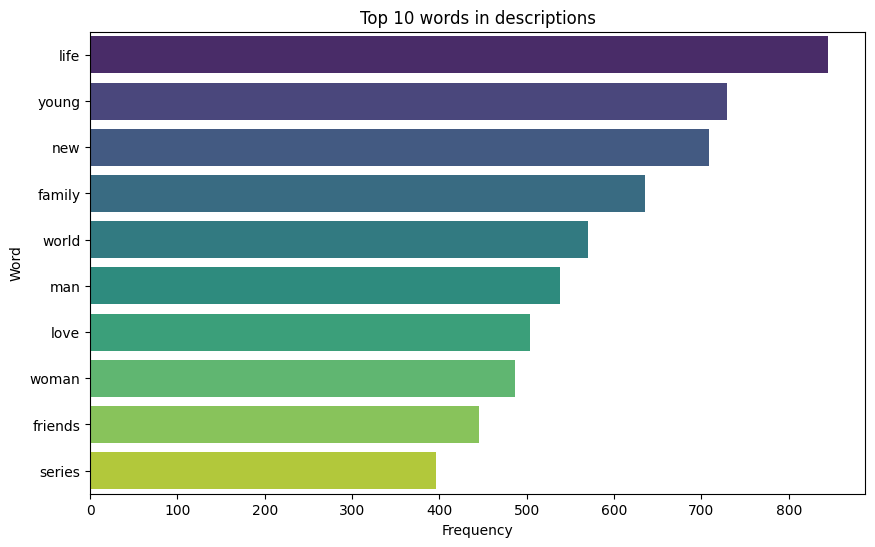

In [42]:
descriptions = df['description'].dropna().tolist()

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(descriptions)

words = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

word_freq = pd.DataFrame({'word': words, 'frequency': frequencies})

top_10_words = word_freq.sort_values(by='frequency', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=top_10_words, palette='viridis')
plt.title('Top 10 words in descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


                              title  cluster
0              Dick Johnson Is Dead        0
1                     Blood & Water        0
2                         Ganglands        0
3             Jailbirds New Orleans        0
4                      Kota Factory        0
5                     Midnight Mass        0
6  My Little Pony: A New Generation        0
7                           Sankofa        0
8     The Great British Baking Show        0
9                      The Starling        0


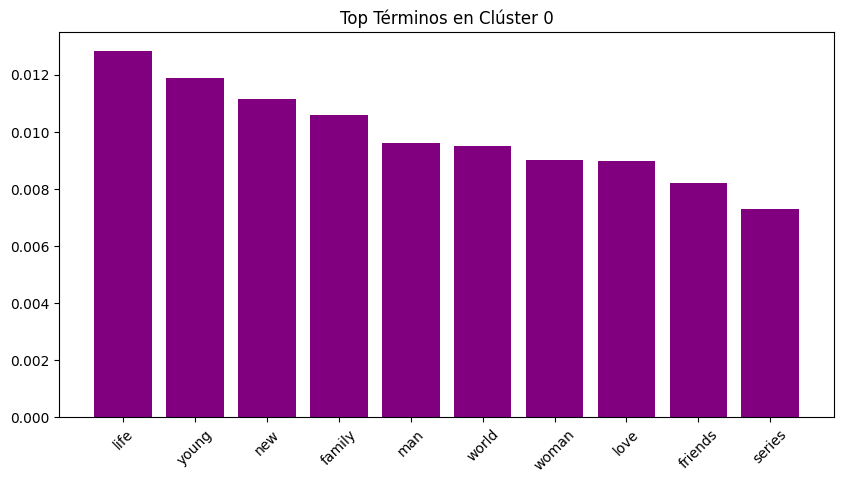

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the descriptions using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

# Define the number of clusters (adjust as needed)
num_clusters = 1
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Get cluster labels for each description
labels = kmeans.labels_

# If you want to attach clusters to the dataframe with titles
df_nonan = df[df['description'].notna()].copy()
df_nonan['cluster'] = labels
print(df_nonan[['title', 'cluster']].head(10))

# Print top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    top_values = [kmeans.cluster_centers_[i][ind] for ind in order_centroids[i, :10]]

    plt.figure(figsize=(10, 5))
    plt.bar(top_terms, top_values, color='purple')
    plt.title(f'Top Términos en Clúster {i}')
    plt.xticks(rotation=45)
    plt.show()

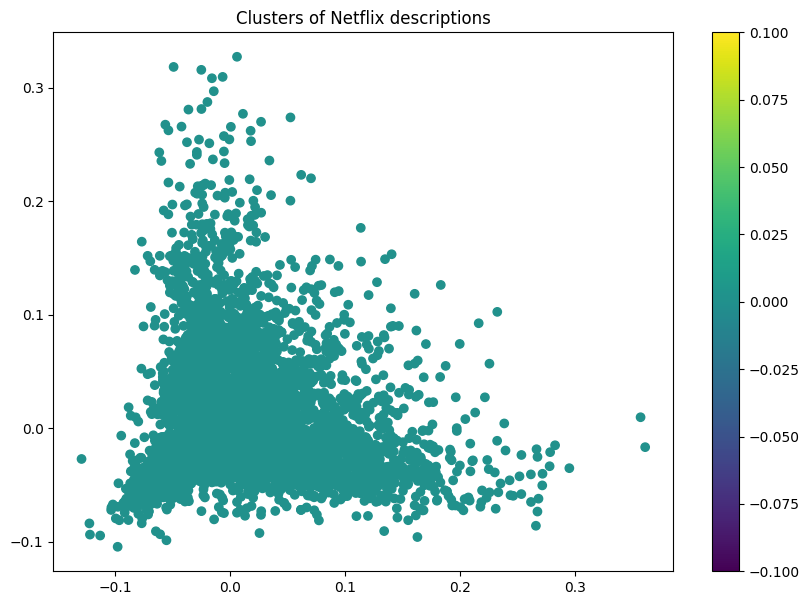

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Graficar los clústeres
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Clusters of Netflix descriptions')
plt.show()

In [53]:
import plotly.express as px

df_plot = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_plot['cluster'] = labels
df_plot['title'] = df_nonan['title'].values

fig = px.scatter(df_plot, x='PC1', y='PC2', color='cluster', hover_data=['title'], 
                 title='Visualización de Clústeres con PCA (Interactiva)')
fig.show()


5. Análisis de Ratings y Público Objetivo:
 - ¿Qué tipos de contenido (género o tipo) tienden a tener clasificaciones de edad más estrictas?
 - ¿Hay relación entre el género y el rating de edad?
 - ¿Cambia la clasificación por edades según el país de origen del contenido?

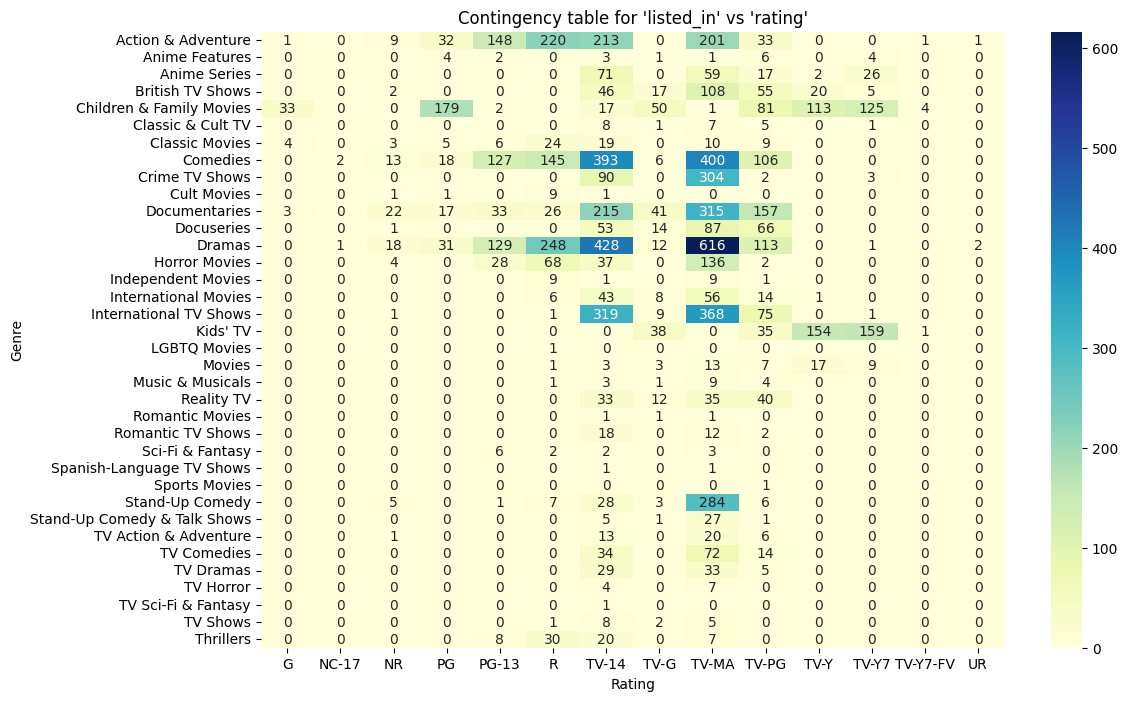

In [ ]:
# Tabla de contingencia para 'type' vs 'rating'
ct_type = pd.crosstab(df['type'], df['rating'])

# Para la tabla de 'listed_in' vs 'rating', se extrae el primer género (en caso de haber múltiples)
df_genre = df[['listed_in', 'rating']].copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(',').str[0].str.strip()

# Tabla de contingencia para 'listed_in' vs 'rating'

ct_genre = pd.crosstab(df_genre['listed_in'], df_genre['rating'])
ratings = [col for col in ct_genre.columns if 'min' in col.lower()]
ct_genre.drop(columns=ratings, inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(ct_genre, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Contingency table for 'listed_in' vs 'rating'")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.show()


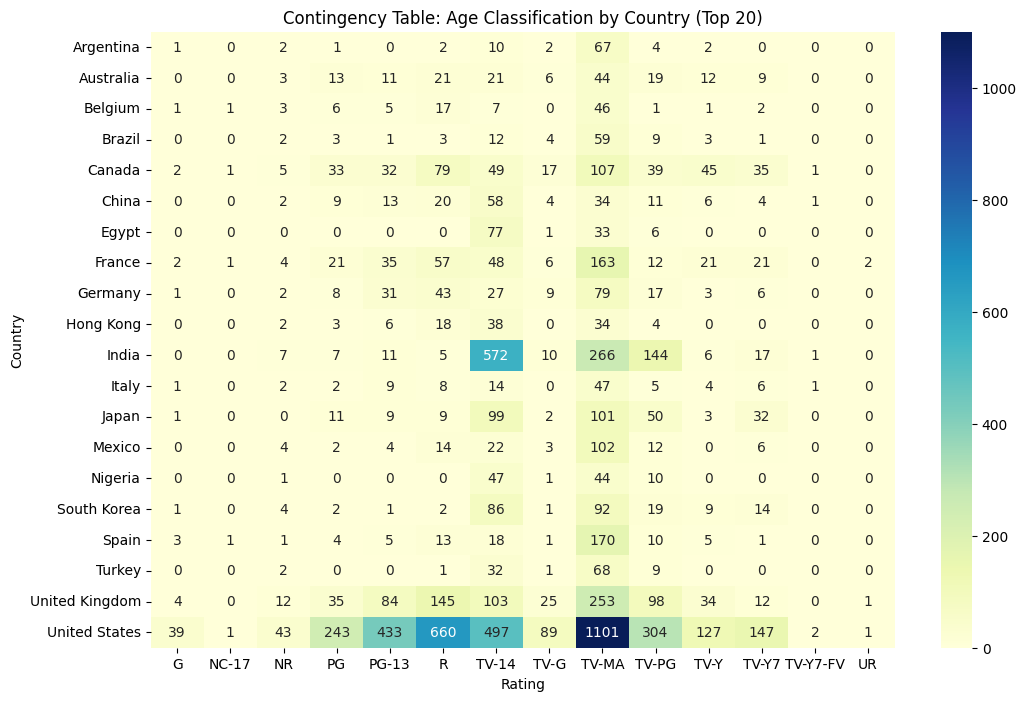

In [68]:
# Select non-null values and split/explode countries
countries_ratings = df[['country', 'rating']].dropna()
countries_ratings['country'] = countries_ratings['country'].str.split(',')
countries_ratings = countries_ratings.explode('country')
countries_ratings['country'] = countries_ratings['country'].str.strip()

# Limit to the top 20 countries by count to avoid overcrowding in the heatmap
top_countries = countries_ratings['country'].value_counts().head(20).index
subset = countries_ratings[countries_ratings['country'].isin(top_countries)]

# Create a contingency table for country vs rating
ct_country_rating = pd.crosstab(subset['country'], subset['rating'])
ct_country_rating.drop(columns=ratings, inplace=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ct_country_rating, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Contingency Table: Age Classification by Country (Top 20)")
plt.xlabel("Rating")
plt.ylabel("Country")
plt.show()

6. Análisis de Colaboraciones y Redes (Network Analysis):
 - ¿Cuáles son los directores más prolíficos en Netflix y con qué actores trabajan más?
 - ¿Hay actores o directores que tienden a trabajar juntos con frecuencia?
 - ¿Qué tan conectados están los actores y directores en términos de colaboraciones?

In [69]:
import networkx as nx

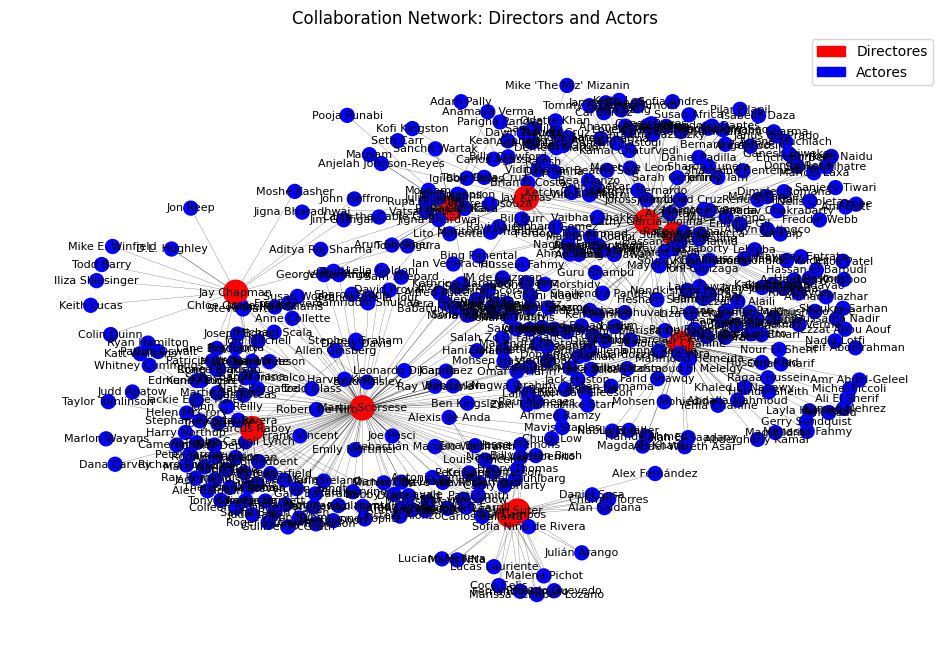

In [86]:
from collections import Counter
import matplotlib.patches as mpatches

G = nx.Graph()

# Filtrar filas con directores y actores definidos
df_da = df.dropna(subset=['director', 'cast']).copy()

# Separar y limpiar los nombres de directores y actores
df_da['director'] = df_da['director'].str.split(',').apply(lambda lst: [d.strip() for d in lst])
df_da['cast'] = df_da['cast'].str.split(',').apply(lambda lst: [a.strip() for a in lst])

# Contar la frecuencia de cada director para identificar los más prolíficos
all_directors = [d for directors in df_da['director'] for d in directors]
director_counts = Counter(all_directors)
top_directors = [director for director, count in director_counts.most_common(10)]

# Construir el grafo: cada directivo de los top se conecta con cada actor de la fila
for _, row in df_da.iterrows():
    for director in row['director']:
        if director in top_directors:
            for actor in row['cast']:
                if actor:
                    if G.has_edge(director, actor):
                        G[director][actor]['weight'] += 1
                    else:
                        G.add_edge(director, actor, weight=1)

# Resaltar nodos de directores en rojo y actores en azul
director_nodes = set(top_directors)
pos = nx.spring_layout(G, k=0.15, iterations=30)

plt.figure(figsize=(12, 8))
node_colors = ['red' if n in director_nodes else 'blue' for n in G.nodes()]
node_sizes = [300 if n in director_nodes else 100 for n in G.nodes()]
edge_widths = [G[u][v]['weight']*0.2 for u, v in G.edges()]


# Agregar leyenda para distinguir entre directores y actores
legend_elements = [
    mpatches.Patch(color='red', label='Directores'),
    mpatches.Patch(color='blue', label='Actores')
]
plt.legend(handles=legend_elements, loc='best')
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Collaboration Network: Directors and Actors")
plt.axis('off')
plt.show()

In [84]:
from collections import Counter

# Create a copy of the dataframe with both director and cast available
df_collab = df.dropna(subset=['director', 'cast']).copy()

# Convert the 'director' and 'cast' strings into lists of names (cleaning white spaces)
df_collab['director'] = df_collab['director'].str.split(',').apply(lambda x: [d.strip() for d in x])
df_collab['cast'] = df_collab['cast'].str.split(',').apply(lambda x: [a.strip() for a in x])

# Build a list of (director, actor) pairs for each title
collab_pairs = []
for _, row in df_collab.iterrows():
    for director in row['director']:
        for actor in row['cast']:
            # Only consider non-empty names
            if director and actor:
                collab_pairs.append((director, actor))
                
# Count the frequency of each director-actor pair
collab_counts = Counter(collab_pairs)
top_collabs = collab_counts.most_common(10)

print("Top 10 colaboraciones frecuentes (Director, Actor):")
for pair, count in top_collabs:
    print(f"{pair}: {count}")

# Opcional: También podemos ver qué actores tienden a trabajar juntos,
# creando pares únicos de actores en cada título (sin importar el orden)
actor_pairs = []
for _, row in df_collab.iterrows():
    casts = row['cast']
    if len(casts) > 1:
        # Extraer todos los pares sin repetir (orden no importa)
        for i in range(len(casts)):
            for j in range(i + 1, len(casts)):
                pair = tuple(sorted((casts[i], casts[j])))
                actor_pairs.append(pair)
                
actor_collab_counts = Counter(actor_pairs)
top_actor_collabs = actor_collab_counts.most_common(10)

print("\nTop 10 colaboraciones frecuentes entre actores:")
for pair, count in top_actor_collabs:
    print(f"{pair}: {count}")

Top 10 colaboraciones frecuentes (Director, Actor):
('Rajiv Chilaka', 'Julie Tejwani'): 19
('Rajiv Chilaka', 'Rajesh Kava'): 19
('Rajiv Chilaka', 'Rupa Bhimani'): 18
('Rajiv Chilaka', 'Jigna Bhardwaj'): 18
('Rajiv Chilaka', 'Vatsal Dubey'): 16
('Rajiv Chilaka', 'Mousam'): 13
('Rajiv Chilaka', 'Swapnil'): 13
('Suhas Kadav', 'Saurav Chakraborty'): 8
('Toshiya Shinohara', 'Kappei Yamaguchi'): 7
('Toshiya Shinohara', 'Satsuki Yukino'): 7

Top 10 colaboraciones frecuentes entre actores:
('Julie Tejwani', 'Rupa Bhimani'): 27
('Julie Tejwani', 'Rajesh Kava'): 21
('Rajesh Kava', 'Rupa Bhimani'): 20
('Jigna Bhardwaj', 'Julie Tejwani'): 18
('Jigna Bhardwaj', 'Rajesh Kava'): 18
('Jigna Bhardwaj', 'Rupa Bhimani'): 17
('Julie Tejwani', 'Vatsal Dubey'): 16
('Rupa Bhimani', 'Vatsal Dubey'): 16
('Jigna Bhardwaj', 'Vatsal Dubey'): 16
('Rajesh Kava', 'Vatsal Dubey'): 16


8. Análisis Exploratorio Profundo:
 - ¿Existen patrones ocultos en la duración de las películas o temporadas?
 - ¿Hay relación entre la duración y la clasificación de edad?
 - ¿Se puede predecir el tipo de contenido (serie o película) en base a sus características?

Una estrategia para descubrir patrones ocultos en la duración de películas o temporadas sería realizar un análisis exploratorio de datos (EDA) enfocado en esta variable. Por ejemplo, podrías hacer lo siguiente:

1. Preparar la variable duración:  
    • Convertir la duración de películas (minutos) y el tiempo estimado de temporadas (por ejemplo, usando un mapeo de “X Season(s)” a minutos u horas) a una misma unidad.  
    • Manejar valores atípicos o inconsistencias en los datos.

2. Análisis descriptivo y visualización:  
    • Utiliza histogramas y diagramas de caja (boxplots) para ver la distribución de la duración.  
    • Separa la visualización por tipo de contenido (película vs. series) o incluso por géneros para ver si existen diferencias claras.  
    • Traza gráficos de densidad para identificar si la distribución presenta “picos” o agrupaciones en ciertos rangos.

3. Comparaciones y segmentación:  
    • Divide la muestra según otros atributos (por ejemplo, clasificación por edades o géneros) y compara las distribuciones de duración.  
    • Realiza un análisis de series temporales agrupando por año de estreno para ver si existen tendencias en la duración a lo largo del tiempo.

4. Técnicas de clustering y reducción de dimensionalidad:  
    • Considera usar técnicas de clustering (como k-means o DBSCAN) teniendo como variable principal la duración (y posiblemente combinándola con otras características) para identificar subgrupos con duraciones similares.  
    • También podrías aplicar análisis de componentes principales (PCA) si incluirás múltiples variables relacionadas para identificar patrones ocultos.

5. Análisis estadístico:  
    • Calcula estadísticas descriptivas (media, mediana, desviación estándar) para cada grupo y utiliza pruebas de hipótesis si deseas confirmar diferencias significativas entre grupos (por ejemplo, películas vs. series o entre distintos géneros).

Con estos pasos lograrás tener una visión integral: desde cómo se distribuyen las duraciones, si existen grupos o clusters de contenidos con tiempos similares, y si esa variable se relaciona con otros atributos. En resumen, combinar visualizaciones (histogramas, boxplots, gráficos de densidad), segmentación por categorías y técnicas de minería de datos (clustering, PCA) te ayudará a descubrir si hay patrones ocultos en la duración.

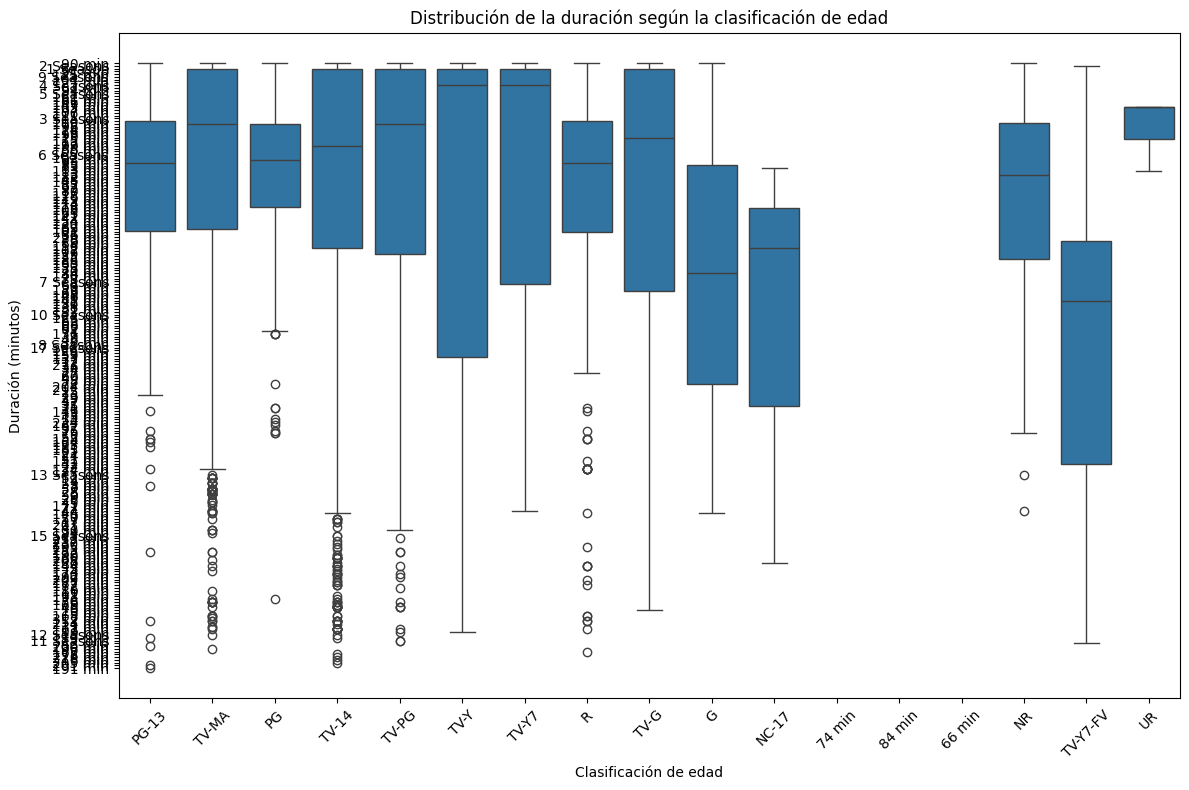

'\n\n4. Adicionalmente, se puede realizar algún análisis estadístico (por ejemplo, un ANOVA) para determinar si existen diferencias significativas en la duración entre los diferentes grupos de ratings.\n\nEn resumen, sí se observa cierta tendencia –los contenidos para audiencias adultas tienden a ser más largos, mientras que los dirigidos a públicos más jóvenes son más breves– pero el análisis debe tener en cuenta otros factores (como el hecho de que películas y series tienen dinámicas de duración muy distintas) para llegar a conclusiones más sólidas.'

In [116]:
"""Se puede observar cierta relación, aunque la respuesta no es tan sencilla como “sí” o “no”. En general, al explorar el dataset de Netflix se puede notar lo siguiente:

• Las películas (o contenidos) con clasificaciones para audiencias adultas (por ejemplo, R, TV-MA o NC-17) tienden a presentar duraciones mayores, ya que generalmente se ofrecen narrativas más complejas o con mayor cantidad de escenas.

• Por el contrario, los contenidos orientados a públicos más jóvenes o familiares (por ejemplo, PG, TV-Y, TV-G o PG-13) suelen tener duraciones más breves, en parte por las limitaciones de formato o por la forma en que se estructuran los programas para ese público.

Para profundizar en la relación se puede proceder de la siguiente forma:

1. Convertir la variable de “duración” a un valor numérico homogéneo (por ejemplo, convertir minutos o, en el caso de series, estimar la duración total en minutos u horas). Esto ya se hizo en algunas celdas anteriores, donde se transformó “90 min” a un número y para series se usó un mapeo (por ejemplo, “1 Season” se convirtió a 1000 minutos y luego se transformó a horas).

2. Asegurarse de disponer también de la información de “rating” (la clasificación de edad) para cada registro.

3. Usar gráficos como diagramas de caja (boxplots) o violín para visualizar la distribución de duraciones según la clasificación de edad. Por ejemplo, mediante Seaborn se puede hacer algo similar a lo siguiente:

"""

# Supongamos que ya tenemos en nuestro DataFrame una columna 'duration_num' (por ejemplo, en minutos)
plt.figure(figsize=(12,8))
sns.boxplot(x='rating', y='duration', data=df)  # df es el DataFrame original o el procesado
plt.title("Distribución de la duración según la clasificación de edad")
plt.xlabel("Clasificación de edad")
plt.ylabel("Duración (minutos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

4. Adicionalmente, se puede realizar algún análisis estadístico (por ejemplo, un ANOVA) para determinar si existen diferencias significativas en la duración entre los diferentes grupos de ratings.

En resumen, sí se observa cierta tendencia –los contenidos para audiencias adultas tienden a ser más largos, mientras que los dirigidos a públicos más jóvenes son más breves– pero el análisis debe tener en cuenta otros factores (como el hecho de que películas y series tienen dinámicas de duración muy distintas) para llegar a conclusiones más sólidas."""

9. Desafíos Avanzados (Opcional):
 - Clusterización: Agrupar películas y series en categorías basadas en descripciones, géneros y duración.
 - Análisis de Sentimientos: Si las descripciones incluyen opiniones, analizar sentimientos positivos o negativos.
 - Predicciones: Intentar predecir el éxito de un contenido (por ejemplo, si es una serie o película popular).

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mpere\AppData\Roaming\nltk_data...


                              title  sentiment_score sentiment_label
0              Dick Johnson Is Dead          -0.2960        negative
1                     Blood & Water          -0.1531        negative
2                         Ganglands          -0.7783        negative
3             Jailbirds New Orleans           0.2263        positive
4                      Kota Factory           0.7430        positive
5                     Midnight Mass           0.1280        positive
6  My Little Pony: A New Generation           0.8402        positive
7                           Sankofa          -0.7845        negative
8     The Great British Baking Show           0.9382        positive
9                      The Starling          -0.6249        negative


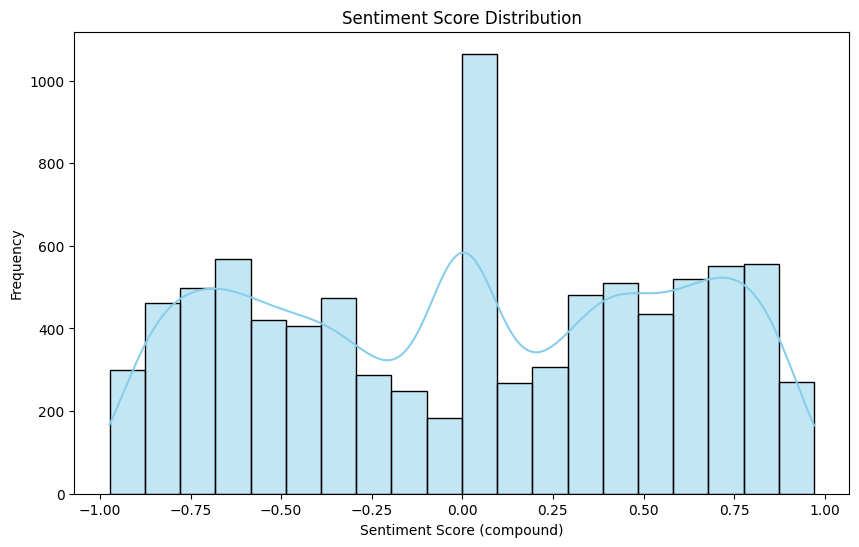

'─────────────────────────────  \nEste código realiza lo siguiente:\n\n1. Se descarga el léxico de VADER y se crea el objeto SentimentIntensityAnalyzer.\n2. Se aplica el método polarity_scores a cada descripción, extrayendo el valor "compound" que resume la polaridad general.\n3. Se etiqueta cada texto como “positivo”, “negativo” o “neutral” según umbrales comunes.\n4. Se imprime una muestra de títulos con sus puntajes y etiquetas.\n5. Finalmente, se grafica la distribución de los puntajes de sentimiento para tener una visión general de cómo se distribuyen los sentimientos en las descripciones.\n\nEsta estrategia te permitirá obtener una visión rápida de si las descripciones contienen opiniones con inclinación positiva o negativa. Puedes, además, adaptar los umbrales o combinarlo con análisis de otros aspectos si fuera necesario.'

In [117]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

"""Aquí tienes un ejemplo de cómo podrías utilizar la biblioteca VADER (incluida en NLTK) para analizar los sentimientos de las descripciones. VADER es una herramienta bastante efectiva para textos en inglés y se utiliza comúnmente para identificar puntajes de sentimiento (positivo, negativo y neutral).

Puedes incluir una nueva celda en el Notebook (por ejemplo, en el índice 37) con el siguiente código:

───────────────────────────── """
# Importar y configurar VADER

nltk.download('vader_lexicon')  # Se descarga el léxico de VADER la primera vez

# Crear el objeto para analizar sentimiento
sid = SentimentIntensityAnalyzer()

# Aplicar análisis de sentimientos en la columna 'description' del DataFrame
# Usaremos la puntuación "compound", que resume la orientación general del sentimiento
df['sentiment_score'] = df['description'].apply(lambda txt: sid.polarity_scores(txt)['compound'])

# Etiquetar el sentimiento según el puntaje (valores típicos: positivo > 0.05, negativo < -0.05, el resto neutral)
df['sentiment_label'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0.05 
                                                       else ('negative' if score < -0.05 else 'neutral'))

# Mostrar algunas muestras para verificar 
print(df[['title', 'sentiment_score', 'sentiment_label']].head(10))

plt.figure(figsize=(10,6))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score (compound)")
plt.ylabel("Frequency")
plt.show()

"""─────────────────────────────  
Este código realiza lo siguiente:

1. Se descarga el léxico de VADER y se crea el objeto SentimentIntensityAnalyzer.
2. Se aplica el método polarity_scores a cada descripción, extrayendo el valor "compound" que resume la polaridad general.
3. Se etiqueta cada texto como “positivo”, “negativo” o “neutral” según umbrales comunes.
4. Se imprime una muestra de títulos con sus puntajes y etiquetas.
5. Finalmente, se grafica la distribución de los puntajes de sentimiento para tener una visión general de cómo se distribuyen los sentimientos en las descripciones.

Esta estrategia te permitirá obtener una visión rápida de si las descripciones contienen opiniones con inclinación positiva o negativa. Puedes, además, adaptar los umbrales o combinarlo con análisis de otros aspectos si fuera necesario."""

Distribución de la etiqueta 'popular':
popular
0    6670
1    2137
Name: count, dtype: int64

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1336
           1       0.47      0.03      0.06       426

    accuracy                           0.76      1762
   macro avg       0.61      0.51      0.46      1762
weighted avg       0.69      0.76      0.67      1762

Exactitud: 75.71%


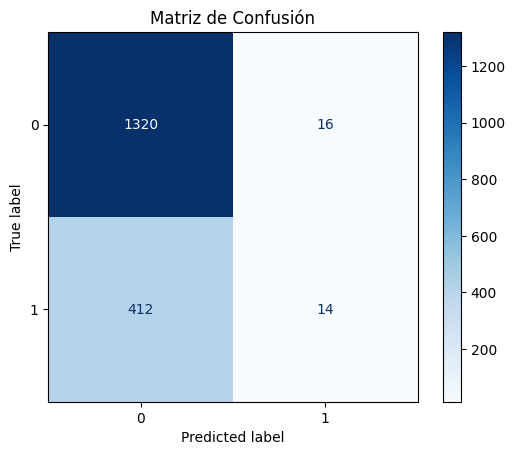

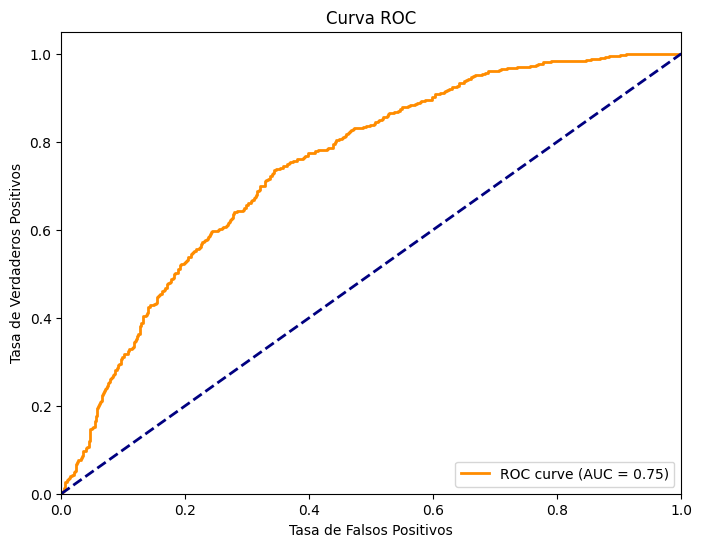

'Este ejemplo ilustra cómo se puede extraer características del texto de las descripciones (a través de TF-IDF) y entrenar un modelo supervisado para predecir una variable “popular” definida a priori. Por supuesto, la definición de “éxito” puede refinarse según otros indicadores disponibles o información externa.'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

"""A continuación se muestra un ejemplo de cómo podrías abordar la predicción del “éxito” de un contenido usando como proxy (por falta de una variable directa de popularidad) la combinación de dos señales: el sentimiento (ya calculado en el DataFrame) y la extensión de la descripción (suponiendo que las descripciones más largas quizá se asocien a contenidos “más importantes” o promovidos). En este ejemplo definimos un contenido como “popular” (éxito = 1) si su puntuación de sentimiento es positiva y su descripción tiene una longitud mayor o igual a la mediana; de lo contrario se marca como no popular (éxito = 0). Posteriormente se entrena un clasificador (por ejemplo, regresión logística) usando únicamente la descripción como input mediante una pipeline que incluye TF-IDF y el clasificador.

Puedes ajustar esta definición –o utilizar otras variables disponibles– según la interpretación que quieras darle al “éxito”. El código se muestra a continuación (nueva celda en el índice 38):
"""
# Predicción de Éxito de un Contenido


# Suponiendo que "df" es el DataFrame original con la información de los contenidos

# 1. Crear una variable proxy para medir el "éxito":
# Definimos que un contenido es popular (éxito = 1) si:
#   • La puntuación de sentimiento es positiva (por ejemplo, > 0)
#   • La longitud de la descripción es al menos la mediana de la longitud en todo el dataset
df_pred = df.copy()
df_pred['desc_length'] = df_pred['description'].apply(len)
median_length = df_pred['desc_length'].median()

df_pred['popular'] = ((df_pred['sentiment_score'] > 0) & (df_pred['desc_length'] >= median_length)).astype(int)

print("Distribución de la etiqueta 'popular':")
print(df_pred['popular'].value_counts())

# 2. Definir las variables predictoras y el target:
# Usaremos la columna 'description' como característica (aunque se podrían incluir otras variables)
X = df_pred['description']
y = df_pred['popular']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Construir la pipeline con TfidfVectorizer y LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(random_state=42))
])

# 5. Entrenar el modelo
pipeline.fit(X_train, y_train)

# 6. Realizar predicciones y evaluar el modelo
y_pred = pipeline.predict(X_test)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Exactitud: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

# (Opcional) 7. Se pueden visualizar otras métricas, como la matriz de confusión o la curva ROC.
# 7. (Opcional) Visualización de la Matriz de Confusión

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# También se puede visualizar la Curva ROC (Receiver Operating Characteristic)

# Obtener las probabilidades predichas para la clase positiva (éxito=1)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calcular tasas de verdaderos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

"""Este ejemplo ilustra cómo se puede extraer características del texto de las descripciones (a través de TF-IDF) y entrenar un modelo supervisado para predecir una variable “popular” definida a priori. Por supuesto, la definición de “éxito” puede refinarse según otros indicadores disponibles o información externa."""